## Submission :
* Make sure that the notebook runs without errors when cells are run in sequence.
* Write your name and roll number in the cell below.
* Rename the notebook to `<RollNumber>_Q1.ipynb` before submission.

Name: Moida Praneeth Jain

Roll Number: 2022101093

# Linear Regression

Linear regression is a statistical technique used to model the relationship between a dependent variable (y) and one or more independent variables (x). In its simplest form, linear regression is a linear approximation of the relationship between y and x. 

$$ y=f(x)$$
$$ y= \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

where $\beta_0$ is the intercept, $\beta_1$ is the coefficient of $x_1$, $\beta_2$ is the coefficient of $x_2$ and so on. The values $\beta_0, \beta_1, \beta_2, ... \beta_n$ are called the parameters of the model.




Now, for multiple data points, the linear equation can be written as:

$$ y_i= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_n x_{in}$$

where $i$ is the $i^{th}$ data point.

The above equation can be written in matrix form as:

$$ Y= X \beta$$

where $Y$ is the vector of dependent variable, $X$ is the matrix of independent variables and $\beta$ is the vector of parameters.

Since there are usually more number of equations than the number of unknowns, the system of linear equations is overdetermined. Thus, all solutions will have some error as there is no line that passes through all the points. 

The goal of linear regression is to find the parameters $\beta$ such that the error is minimum. The error is measured as the sum of squared errors between the actual and predicted values. This method is called the least squares method.

$$ E= \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

where $y_i$ is the actual value and $\hat{y_i}$ is the predicted value.


Here is an example of linear regression with one independent variable:


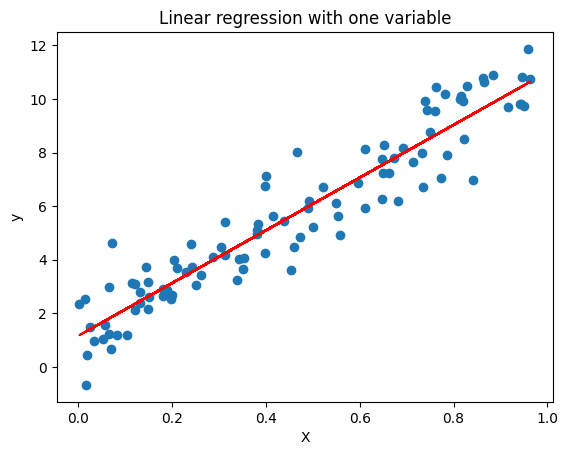

In [171]:
# Linear regression with one variable

import numpy as np
import matplotlib.pyplot as plt

data =np.random.rand(100,2)
data[:,1] = data[:,0]*10 + 1 + np.random.randn(100)
X = data[:,0]
y = data[:,1]

import sklearn.linear_model as lm
model = lm.LinearRegression()
model.fit(X.reshape(-1,1),y.reshape(-1,1))

plt.scatter(X,y)
plt.plot(X,model.predict(X.reshape(-1,1)),color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear regression with one variable')
plt.show()

The solutions to the previous least squares problem are given by the nxn matrix equation, also known as the normal equation:

$$ (X^T X) \beta = X^T Y$$

where $X^T$ is the transpose of $X$.

(Note that $(X^T X)^{-1} X^T$ is called the Moore-Penrose pseudo-inverse of $X$)

For the first 3 questions, you can either write the solutions using LaTeX in markdown cell or submit the solutions separately labeled as solutions.pdf

### Q1. Prove that $X^T X$ is invertible if and only if the columns of $X$ are linearly independent. 

### Q2. Find the solution for $\beta$ if the matrix $X$ is decomposed as $X=QR$ using QR decomposition, where $Q$ is an orthogonal matrix and $R$ is an upper triangular matrix.

### Q3. Find the solution for $\beta$ if the matrix $X$ is decomposed as $X=UDV^T$ using Singular Value Decomposition, where $U$ and $V$ are orthogonal matrices and $D$ is a diagonal matrix.

You will need to install the following packages:
* numpy
* matplotlib
* pandas
* sklearn

We will be using the Iris dataset for this exercise. The dataset can be fetched from the sklearn library. The dataset contains 150 data points with 4 features. More information about the dataset can be found here: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [172]:
# load iris dataset
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)


print(iris.DESCR)
iris.data.head()

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [173]:
y = iris.data['petal width (cm)']
X = iris.data.drop('petal width (cm)', axis=1)

Split the dataset into training and test sets. Use the training set to find the $\beta$ vector, then use the X_test instances to find y_pred with the $\beta$ values. Find the mean squared error between the actual and predicted values using the test set.

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Q4. Perform linear regression on the dataset using the normal equation. Report the mean squared error. (Do not use pinv function to find the pseudo-inverse)

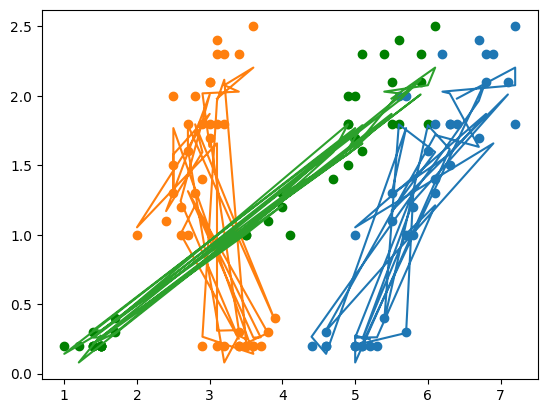

Mean squared error is 0.0369


In [266]:
X_train_transpose = X_train.transpose()
pseudo_inverse = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T)
betas = pseudo_inverse.dot(y_train)

plt.scatter(X_test['petal length (cm)'], y_test, color='green')
plt.scatter(X_test['sepal length (cm)'], y_test)
plt.scatter(X_test['sepal width (cm)'], y_test)

y_pred = X_test.dot(betas)
plt.plot(X_test, y_pred)
plt.show()

squared_error = sum((a-b)**2 for a,b in zip(y_pred, y_test))
mean_squared_error = squared_error / len(y_pred)
print(f"Mean squared error is {mean_squared_error:.4f}")

### Q6. Perform linear regression on the dataset using QR decomposition. Report the mean squared error. (You can use the QR decomposition function from numpy.linalg)

### Q7. Perform linear regression on the dataset using SVD. Report the mean squared error. (You can use the SVD function from numpy.linalg)

### Q8. Compare the results of the three methods. Which method is the best? Why?
